In [4]:
import pandas as pd

from io import StringIO

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

In [2]:
orig_text = """
                                                      oof_accuracy                                                         test_accuracy                                                        
                                                              mean t_int_l t_int_h    std                           values          mean t_int_l t_int_h    std                           values
name                                                                                                                                                                                            
lgb_embeds: emb__hidden_size_bs_0256_hs_160.pickle          0.6212  0.6190  0.6235 0.0016  [0.619 0.621 0.621 0.622 0.624]        0.6134  0.6101  0.6167 0.0024  [0.611 0.612 0.613 0.615 0.616]
lgb_embeds: emb__hidden_size_bs_0256_hs_224.pickle          0.6187  0.6118  0.6256 0.0050  [0.610 0.618 0.621 0.622 0.623]        0.6172  0.6138  0.6206 0.0024  [0.615 0.615 0.617 0.619 0.620]
lgb_embeds: emb__hidden_size_bs_0256_hs_352.pickle          0.6273  0.6212  0.6334 0.0044  [0.622 0.624 0.629 0.630 0.632]        0.6252  0.6216  0.6288 0.0026  [0.622 0.624 0.624 0.627 0.628]
lgb_embeds: emb__hidden_size_bs_0256_hs_480.pickle          0.6276  0.6245  0.6307 0.0022  [0.625 0.626 0.627 0.629 0.631]        0.6293  0.6230  0.6355 0.0045  [0.623 0.626 0.631 0.633 0.633]
lgb_embeds: emb__hidden_size_bs_0512_hs_016.pickle          0.5726  0.5624  0.5828 0.0073  [0.565 0.566 0.572 0.580 0.580]        0.5739  0.5642  0.5835 0.0069  [0.566 0.569 0.574 0.577 0.584]
lgb_embeds: emb__hidden_size_bs_0512_hs_032.pickle          0.5963  0.5901  0.6024 0.0044  [0.591 0.592 0.599 0.599 0.601]        0.5872  0.5812  0.5932 0.0043  [0.581 0.585 0.589 0.590 0.591]
lgb_embeds: emb__hidden_size_bs_0512_hs_064.pickle          0.6114  0.6068  0.6160 0.0033  [0.608 0.608 0.612 0.615 0.615]        0.6131  0.6097  0.6165 0.0024  [0.610 0.612 0.613 0.615 0.616]
lgb_embeds: emb__hidden_size_bs_0512_hs_096.pickle          0.6146  0.6072  0.6220 0.0053  [0.606 0.613 0.616 0.618 0.620]        0.6072  0.6035  0.6109 0.0027  [0.604 0.606 0.607 0.610 0.610]
lgb_embeds: emb__hidden_size_bs_0512_hs_128.pickle          0.6148  0.6072  0.6224 0.0055  [0.608 0.612 0.615 0.616 0.623]        0.6124  0.6084  0.6164 0.0029  [0.609 0.611 0.612 0.613 0.617]
lgb_embeds: emb__hidden_size_bs_0512_hs_160.pickle          0.6191  0.6133  0.6249 0.0042  [0.614 0.615 0.621 0.622 0.623]        0.6151  0.6057  0.6246 0.0068  [0.606 0.611 0.617 0.618 0.624]
lgb_embeds: emb__hidden_size_bs_0512_hs_192.pickle          0.6170  0.6119  0.6222 0.0037  [0.613 0.615 0.615 0.619 0.623]        0.6125  0.6075  0.6174 0.0036  [0.609 0.610 0.610 0.615 0.618]
lgb_embeds: emb__hidden_size_bs_0512_hs_224.pickle          0.6209  0.6128  0.6289 0.0058  [0.614 0.620 0.620 0.620 0.630]        0.6259  0.6209  0.6308 0.0036  [0.621 0.624 0.626 0.628 0.630]
lgb_embeds: emb__hidden_size_bs_1024_hs_064.pickle          0.6053  0.5997  0.6110 0.0041  [0.601 0.601 0.606 0.609 0.609]        0.5991  0.5931  0.6052 0.0043  [0.595 0.596 0.597 0.601 0.606]
lgb_embeds: emb__hidden_size_bs_1024_hs_096.pickle          0.6099  0.6032  0.6166 0.0048  [0.602 0.608 0.613 0.613 0.614]        0.6067  0.6017  0.6117 0.0036  [0.603 0.604 0.606 0.610 0.611]
linear_embeds: emb__hidden_size_bs_0256_hs_160.pickle       0.6113  0.6058  0.6169 0.0040  [0.605 0.610 0.612 0.615 0.615]        0.6099  0.6039  0.6158 0.0043  [0.605 0.607 0.609 0.614 0.614]
linear_embeds: emb__hidden_size_bs_0256_hs_224.pickle       0.6166  0.6134  0.6197 0.0023  [0.615 0.615 0.616 0.617 0.620]        0.6130  0.6090  0.6170 0.0029  [0.609 0.612 0.613 0.615 0.616]
linear_embeds: emb__hidden_size_bs_0256_hs_352.pickle       0.6184  0.6142  0.6225 0.0030  [0.613 0.619 0.619 0.620 0.621]        0.6121  0.6080  0.6162 0.0030  [0.607 0.612 0.613 0.614 0.614]
linear_embeds: emb__hidden_size_bs_0256_hs_480.pickle       0.6221  0.6161  0.6281 0.0043  [0.618 0.619 0.622 0.623 0.629]        0.6219  0.6171  0.6268 0.0035  [0.618 0.621 0.622 0.622 0.627]
linear_embeds: emb__hidden_size_bs_0512_hs_016.pickle       0.5660  0.5565  0.5755 0.0068  [0.560 0.561 0.563 0.571 0.575]        0.5682  0.5665  0.5699 0.0012  [0.567 0.567 0.569 0.569 0.570]
linear_embeds: emb__hidden_size_bs_0512_hs_032.pickle       0.5870  0.5815  0.5925 0.0040  [0.581 0.584 0.589 0.590 0.591]        0.5827  0.5787  0.5867 0.0029  [0.580 0.580 0.583 0.584 0.587]
linear_embeds: emb__hidden_size_bs_0512_hs_064.pickle       0.6027  0.5958  0.6095 0.0049  [0.597 0.599 0.604 0.606 0.608]        0.6057  0.6018  0.6096 0.0028  [0.602 0.604 0.606 0.607 0.609]
linear_embeds: emb__hidden_size_bs_0512_hs_096.pickle       0.6048  0.5994  0.6102 0.0039  [0.599 0.603 0.606 0.608 0.608]        0.6055  0.6034  0.6075 0.0015  [0.603 0.605 0.606 0.606 0.607]
linear_embeds: emb__hidden_size_bs_0512_hs_128.pickle       0.6099  0.6039  0.6158 0.0043  [0.603 0.609 0.611 0.611 0.615]        0.6063  0.6000  0.6127 0.0046  [0.600 0.604 0.608 0.610 0.611]
linear_embeds: emb__hidden_size_bs_0512_hs_160.pickle       0.6116  0.6089  0.6142 0.0019  [0.609 0.611 0.612 0.612 0.614]        0.6129  0.6110  0.6147 0.0013  [0.612 0.612 0.612 0.613 0.615]
linear_embeds: emb__hidden_size_bs_0512_hs_192.pickle       0.6111  0.6045  0.6178 0.0048  [0.605 0.607 0.613 0.614 0.617]        0.6082  0.6065  0.6099 0.0012  [0.607 0.607 0.608 0.609 0.610]
linear_embeds: emb__hidden_size_bs_0512_hs_224.pickle       0.6174  0.6094  0.6254 0.0058  [0.611 0.611 0.621 0.621 0.623]        0.6147  0.6137  0.6157 0.0007  [0.614 0.614 0.615 0.615 0.615]
linear_embeds: emb__hidden_size_bs_1024_hs_064.pickle       0.5962  0.5902  0.6022 0.0043  [0.592 0.592 0.597 0.600 0.601]        0.5988  0.5963  0.6013 0.0018  [0.598 0.598 0.598 0.599 0.602]
linear_embeds: emb__hidden_size_bs_1024_hs_096.pickle       0.6039  0.6018  0.6059 0.0015  [0.602 0.602 0.604 0.605 0.606]        0.6024  0.6007  0.6041 0.0012  [0.601 0.602 0.603 0.603 0.604]
xgb_embeds: emb__hidden_size_bs_0256_hs_160.pickle          0.6118  0.6060  0.6175 0.0042  [0.605 0.611 0.612 0.614 0.616]        0.6086  0.6011  0.6161 0.0054  [0.603 0.605 0.607 0.610 0.617]
xgb_embeds: emb__hidden_size_bs_0256_hs_224.pickle          0.6118  0.6066  0.6171 0.0038  [0.607 0.609 0.613 0.614 0.616]        0.6101  0.6043  0.6160 0.0042  [0.603 0.609 0.611 0.613 0.614]
xgb_embeds: emb__hidden_size_bs_0256_hs_352.pickle          0.6171  0.6080  0.6262 0.0066  [0.610 0.610 0.619 0.622 0.624]        0.6140  0.6128  0.6152 0.0008  [0.613 0.613 0.614 0.615 0.615]
xgb_embeds: emb__hidden_size_bs_0256_hs_480.pickle          0.6173  0.6119  0.6227 0.0039  [0.613 0.613 0.619 0.620 0.621]        0.6197  0.6134  0.6261 0.0046  [0.613 0.618 0.621 0.623 0.625]
xgb_embeds: emb__hidden_size_bs_0512_hs_016.pickle          0.5704  0.5637  0.5771 0.0048  [0.565 0.566 0.574 0.574 0.574]        0.5751  0.5688  0.5814 0.0045  [0.569 0.572 0.577 0.579 0.579]
xgb_embeds: emb__hidden_size_bs_0512_hs_032.pickle          0.5903  0.5868  0.5939 0.0026  [0.588 0.589 0.589 0.591 0.595]        0.5849  0.5805  0.5894 0.0032  [0.581 0.584 0.584 0.587 0.589]
xgb_embeds: emb__hidden_size_bs_0512_hs_064.pickle          0.6064  0.5992  0.6136 0.0052  [0.601 0.602 0.608 0.609 0.613]        0.6013  0.5958  0.6068 0.0040  [0.596 0.600 0.601 0.604 0.606]
xgb_embeds: emb__hidden_size_bs_0512_hs_096.pickle          0.6053  0.5982  0.6123 0.0051  [0.599 0.601 0.607 0.609 0.611]        0.6019  0.5979  0.6060 0.0029  [0.597 0.602 0.603 0.603 0.605]
xgb_embeds: emb__hidden_size_bs_0512_hs_128.pickle          0.6123  0.6055  0.6190 0.0049  [0.606 0.610 0.610 0.615 0.619]        0.6031  0.5970  0.6093 0.0044  [0.596 0.602 0.603 0.606 0.608]
xgb_embeds: emb__hidden_size_bs_0512_hs_160.pickle          0.6106  0.6032  0.6179 0.0053  [0.606 0.607 0.609 0.612 0.619]        0.6077  0.6052  0.6102 0.0018  [0.606 0.607 0.607 0.609 0.610]
xgb_embeds: emb__hidden_size_bs_0512_hs_192.pickle          0.6102  0.6061  0.6143 0.0030  [0.606 0.608 0.611 0.612 0.614]        0.6060  0.6004  0.6116 0.0041  [0.602 0.603 0.604 0.608 0.612]
xgb_embeds: emb__hidden_size_bs_0512_hs_224.pickle          0.6156  0.6086  0.6225 0.0050  [0.607 0.614 0.617 0.619 0.620]        0.6101  0.6088  0.6115 0.0010  [0.609 0.609 0.610 0.610 0.612]
xgb_embeds: emb__hidden_size_bs_1024_hs_064.pickle          0.5990  0.5972  0.6008 0.0013  [0.598 0.598 0.599 0.600 0.600]        0.5921  0.5863  0.5980 0.0042  [0.585 0.591 0.593 0.595 0.596]
xgb_embeds: emb__hidden_size_bs_1024_hs_096.pickle          0.6054  0.6008  0.6100 0.0033  [0.600 0.605 0.606 0.606 0.609]        0.6049  0.6009  0.6090 0.0029  [0.602 0.603 0.604 0.607 0.609]
"""

In [15]:
col_stats = ['mean', 't_int_l', 't_int_h', 'std'] + [f'{i}' for i in range(5)]

In [116]:
df = pd.read_fwf(StringIO(orig_text)).iloc[3:]
df.columns = ['name'] + [f'{k}.{n}' for k in ['valid', 'test'] for n in col_stats]

In [117]:
df = pd.concat([
    df['name'].str.extract(
        r'(?P<model_type>\w+): emb__hidden_size_bs_(?P<batch_size>\d+)_hs_(?P<hidden_size>\d+)\.pickle'),
    df
], axis=1)

In [118]:
for col, dt in df.dtypes.iteritems():
    if col in ('name', 'model_type'):
        continue
    if dt == 'float':
        continue
    df[col] = pd.to_numeric(df[col].str.strip('[').str.strip(']'))

In [137]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightyellow' if v else '' for v in is_max]

In [138]:
df.pivot_table(index=['batch_size', 'hidden_size'], columns='model_type', values='valid.mean') \
    .style.apply(highlight_max, axis=1)

In [139]:
df2 = pd.melt(
    df,
    id_vars=['model_type', 'batch_size', 'hidden_size', 'name'],
    var_name='fold_n',
    value_vars=[f'valid.{i}' for i in range(5)],
    value_name='accuracy',
)

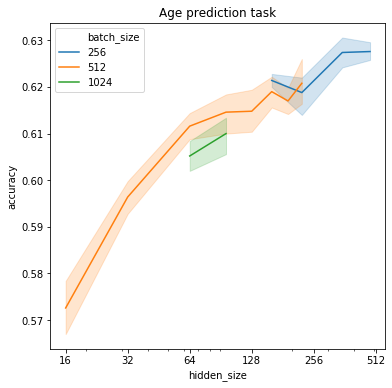

In [140]:
plt.figure(figsize=(6, 6))
ax = sns.lineplot(
    x='hidden_size',
    y='accuracy',
    hue='batch_size', palette='tab10',
    data=df2[lambda x: x['model_type'].eq('lgb_embeds')],
    ci=95,
)
plt.title('Age prediction task')
ax.set_xscale('log'),
ax.set_xticks([2 ** i for i in range(4, 10)])
ax.get_xaxis().set_major_formatter(ScalarFormatter())
plt.show()